In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor

##### Q1: How many hours per day do you spend on social media?
##### Q2: How do you feel being the center of attention
##### Q3: Working while being observed
##### Q4: Talking face to face with someone you don't know very well
##### Q5: Expressing disagreement or disapproval to someone you don't know very well
##### Q6: Are you extremely conscious of your actions when in social settings because you fear they might offend someone or    you could be rejected?,
##### Q7: Do you feel anxious or panicky before social situations?
##### The rank netween 1-5 when 1 is comfortable and 5 is very un-comfortable 

In [48]:
url = 'https://raw.githubusercontent.com/yrhein01/Fina-project/main/Social_Anxiety_Survey_Master.csv'
data = pd.read_csv(url)
data

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/31/2019 16:11:56,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2
62,12/31/2019 16:12:42,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4
63,12/31/2019 21:23:06,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1
64,1/1/2020 15:15,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4


In [49]:
data = data.drop('Timestamp', axis = 1)
data

,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1
1,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4
2,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4
3,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1
4,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...
61,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2
62,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4
63,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1
64,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4


In [50]:
data['Total Q2-Q7'] = (data['Q2'].astype(int))+(data['Q3'].astype(int))+(data['Q4'].astype(int))+(data['Q5'].astype(int))+(data['Q6'].astype(int))+(data['Q7'].astype(int))
data

,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Q2-Q7
0,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,17
1,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,18
2,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,21
3,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,18
4,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...
61,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2,24
62,Male,Yes,20 or below,Single,Less than 4 hours per day,3,2,5,3,1,4,18
63,Female,Yes,21 - 30,Single,4 hours and above per day,1,1,1,4,5,1,13
64,Male,Yes,21 - 30,Single,Less than 3 hours per day,2,4,4,4,4,4,22


<function matplotlib.pyplot.show(close=None, block=None)>

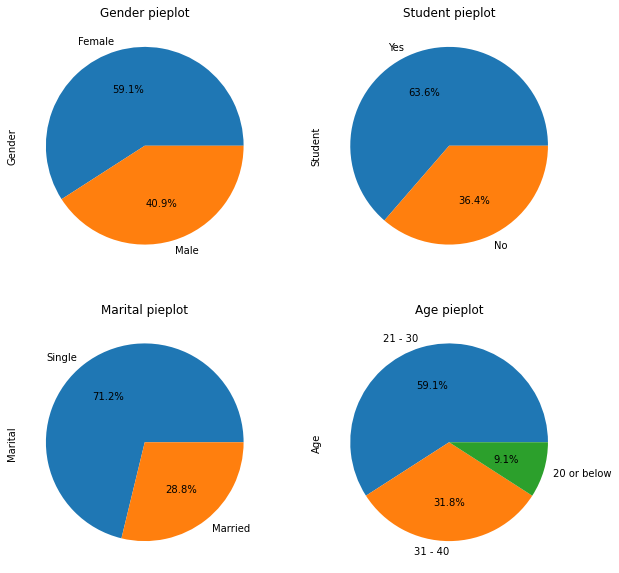

In [51]:
plt.figure(5, figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Gender pieplot')
gender_pieplot = data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.subplot(2,2,2)
plt.title('Student pieplot')
student_pieplot = data['Student'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.subplot(2,2,3)
plt.title('Marital pieplot')
marital_pieplot = data['Marital'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.subplot(2,2,4)
plt.title('Age pieplot')
age_pieplot = data['Age'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show